<a href="https://colab.research.google.com/github/hemanthkumar17/Economics-Coding-Project-2020/blob/main/Univariate_Analysis_of_Aerosol_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Analysis of Aerosol Index of Various Cities in India


In [ ]:
!git clone https://github.com/aneeshsharma/AerosolIndexAnalysis.git

fatal: destination path 'AerosolIndexAnalysis' already exists and is not an empty directory.


In [ ]:
cd AerosolIndexAnalysis/data

/content/AerosolIndexAnalysis/data


In [ ]:
ls

ahmadabad_weekly.csv   chennai_weekly.csv    kolkata_weekly.csv
bangalore_weekly.csv   delhi_weekly.csv      mumbai_weekly.csv
bangalore_weekly.xlsx  hyderabad_weekly.csv  placeholder
bhopal_weekly.csv      jaipur_weekly.csv     pune_weekly.csv


In [ ]:
import glob
import pandas as pd

glued_data = pd.DataFrame()
file_names = []
dataframes = []
for file_name in glob.glob('./*.csv'):
    dataframes.append(pd.read_csv(file_name, low_memory=False))
    file_names.append(file_name[2:])

In [ ]:
file_names

['pune_weekly.csv',
 'hyderabad_weekly.csv',
 'bhopal_weekly.csv',
 'ahmadabad_weekly.csv',
 'bangalore_weekly.csv',
 'jaipur_weekly.csv',
 'kolkata_weekly.csv',
 'chennai_weekly.csv',
 'delhi_weekly.csv',
 'mumbai_weekly.csv']

In [ ]:
index = file_names.index('bangalore_weekly.csv')
dataframes[index]['ward_no'] = dataframes[index]['WARD_NO']

In [ ]:
clean = []
for df in dataframes:
  clean.append(df[['ward_no', 'date', 'mean']])

## Univariate Analysis
Here, we take the mean of the Aerosol Index of all wards within cities on each date and plot it. We group the rows by date and take the mean of all the values.

In [ ]:
avg = []
for city in clean:
    avg.append(city.groupby('date').agg({'mean': ['mean']}).reset_index())

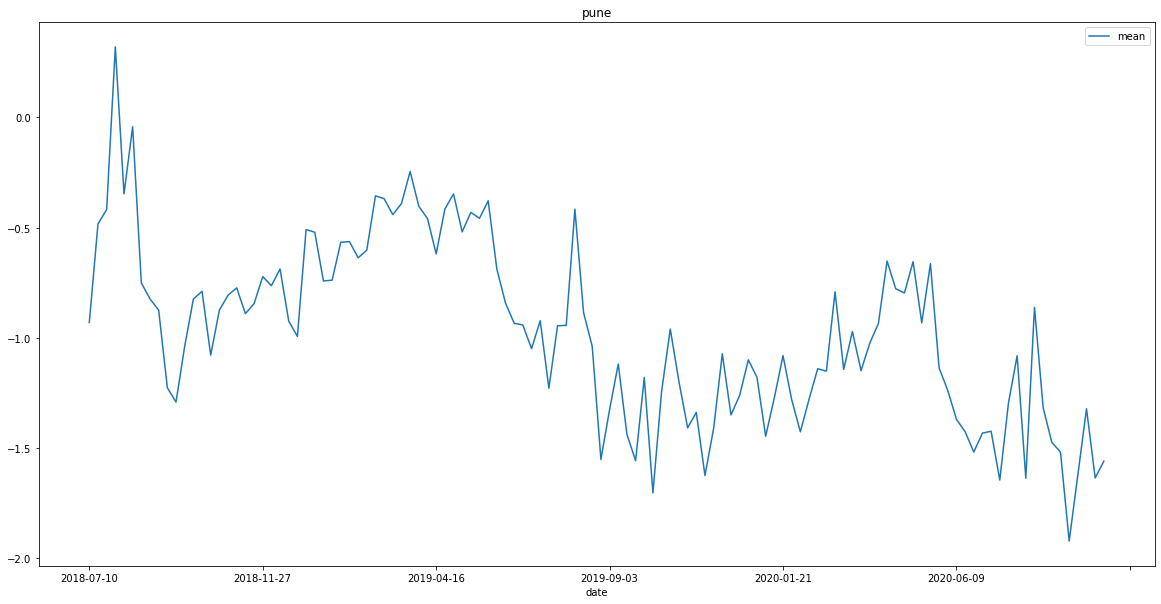

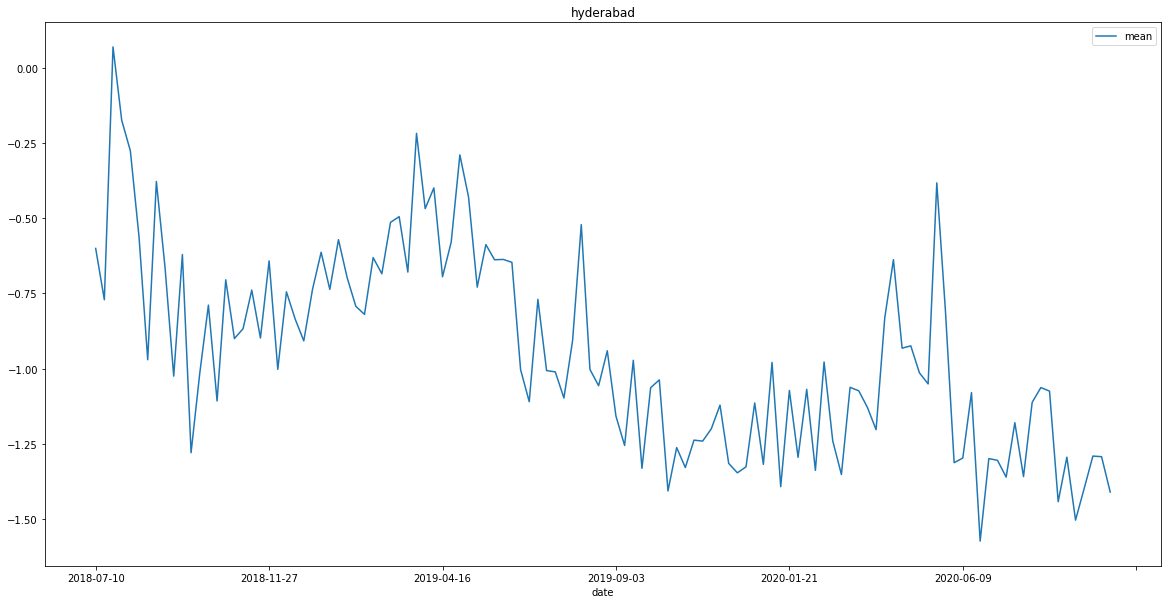

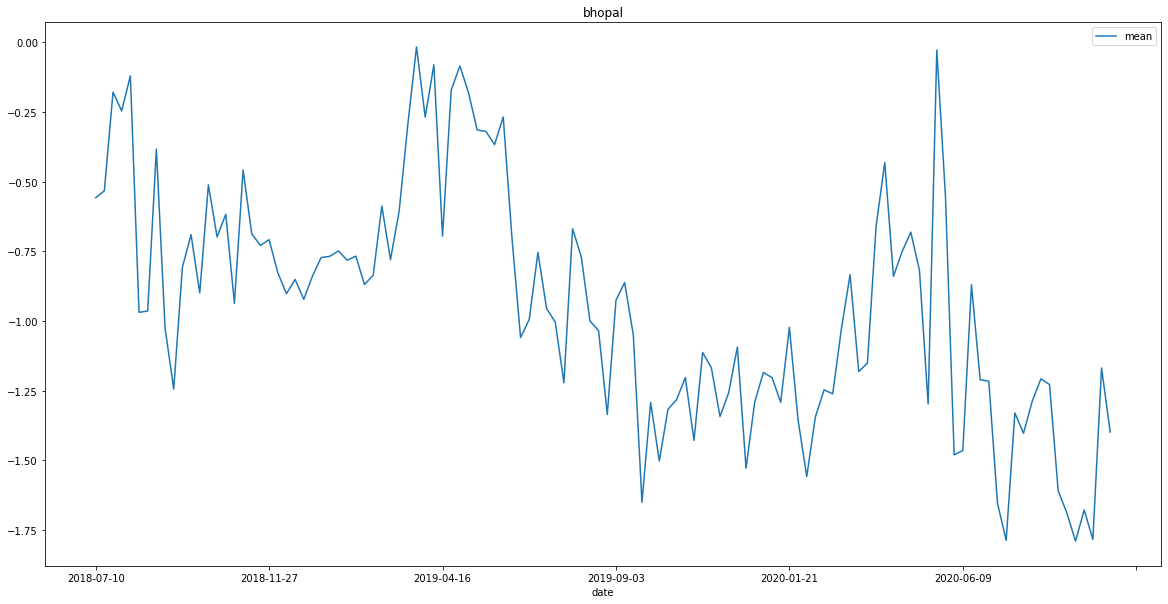

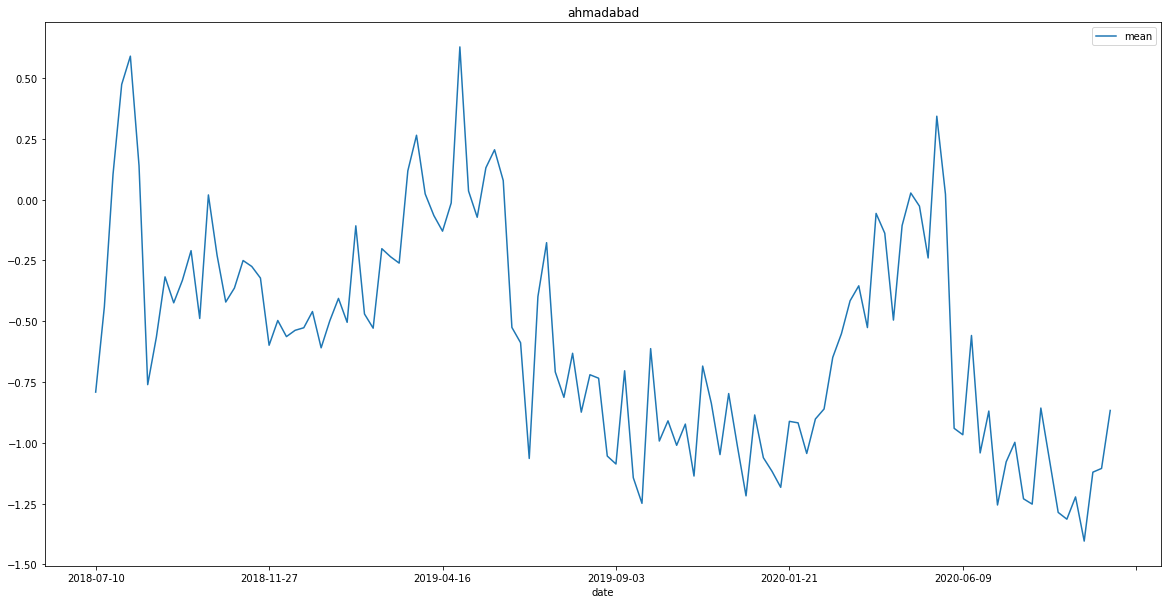

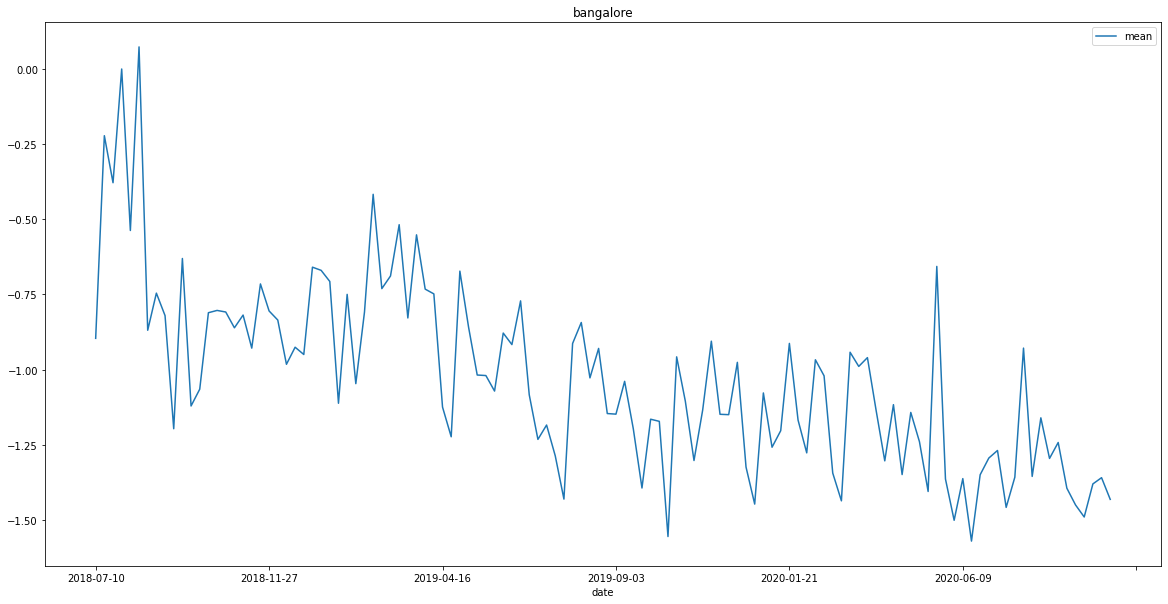

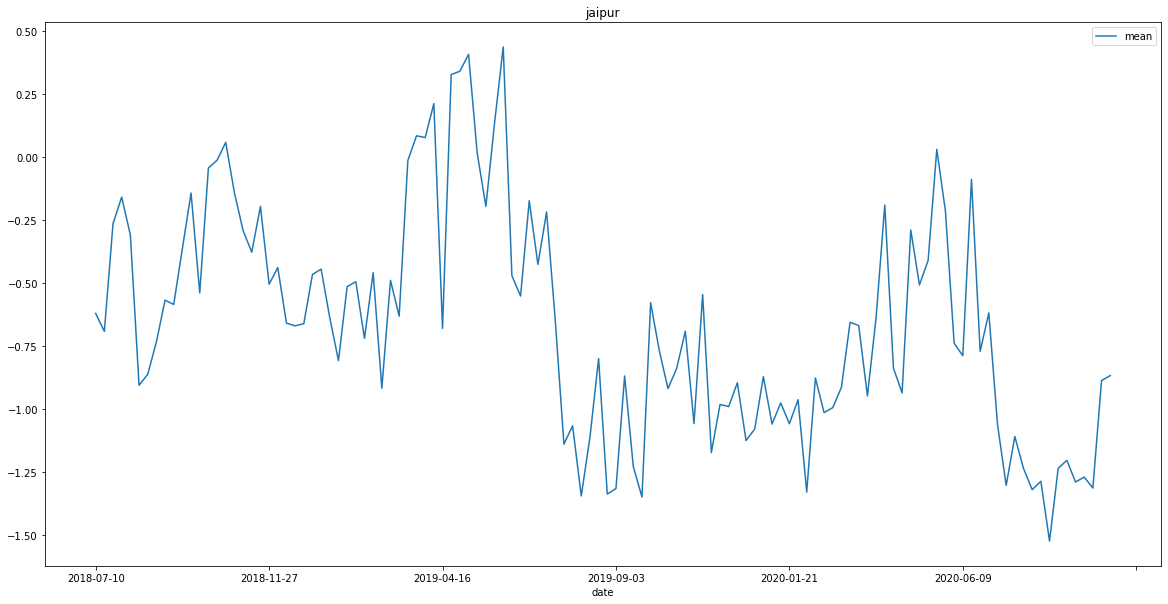

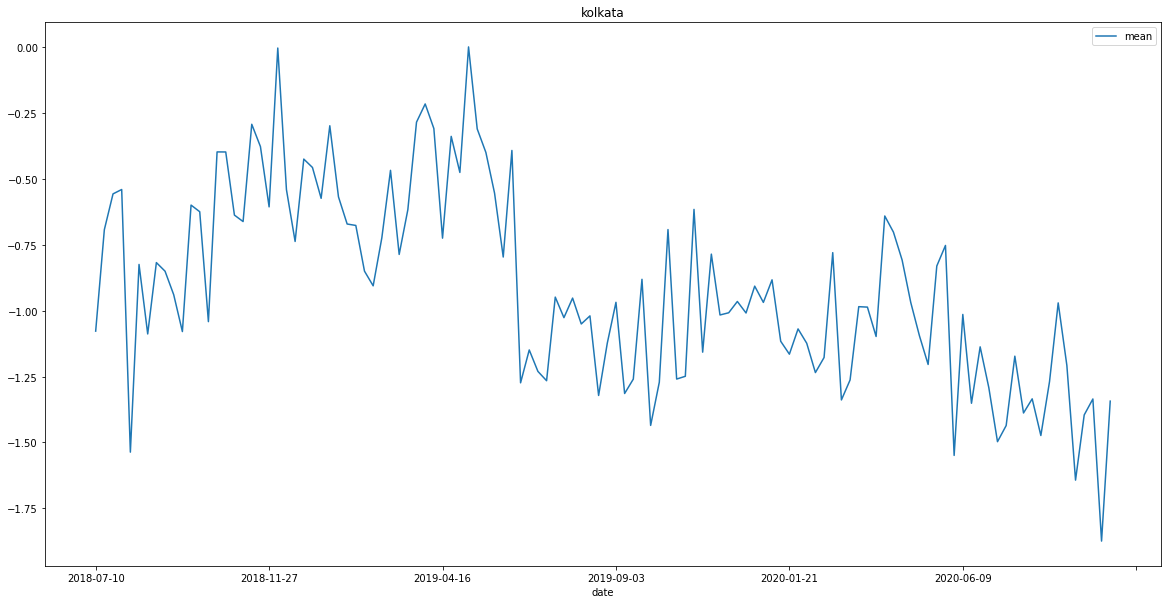

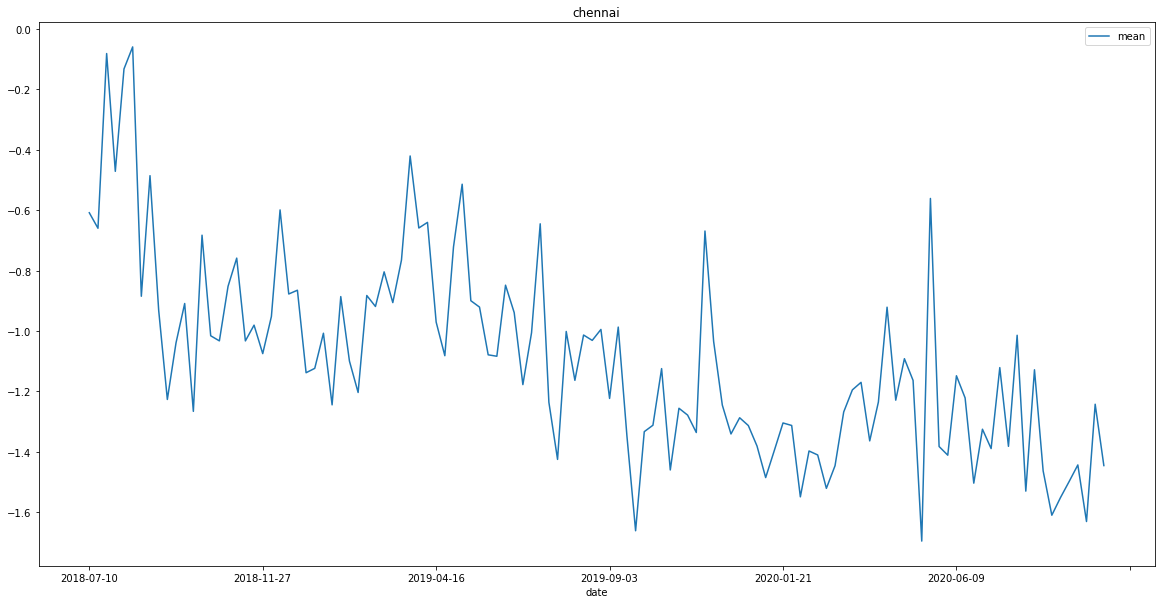

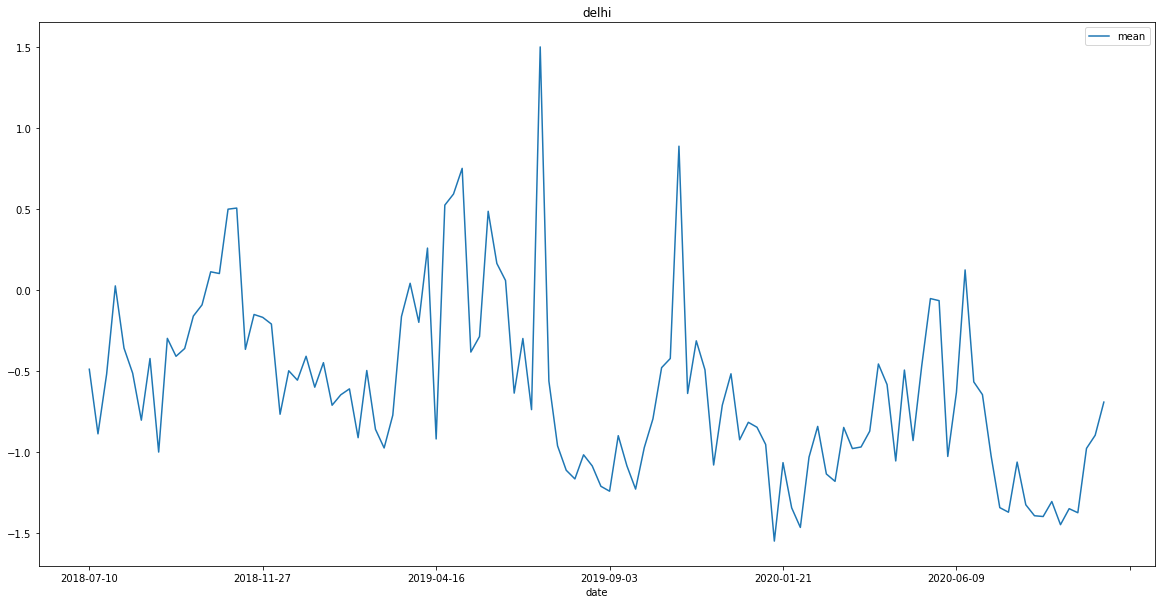

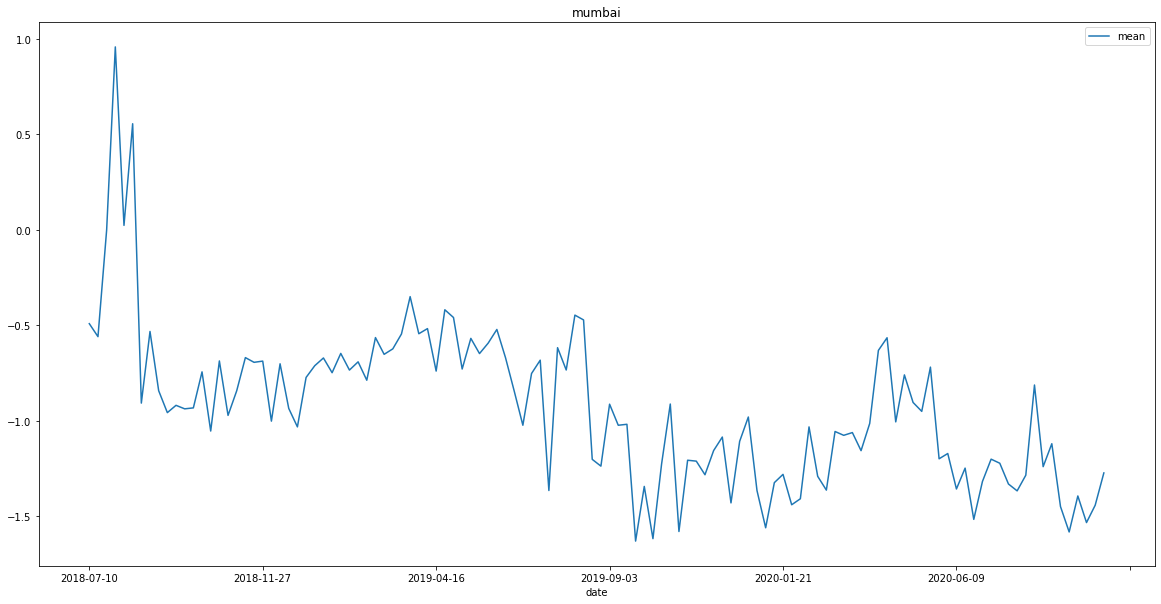

In [ ]:
city_names = [name[:name.index('_')] for name in file_names]
for i in range(len(avg)):
    city = avg[i]
    city.plot(x='date', y='mean', figsize=(20, 10), kind='line', title=city_names[i])

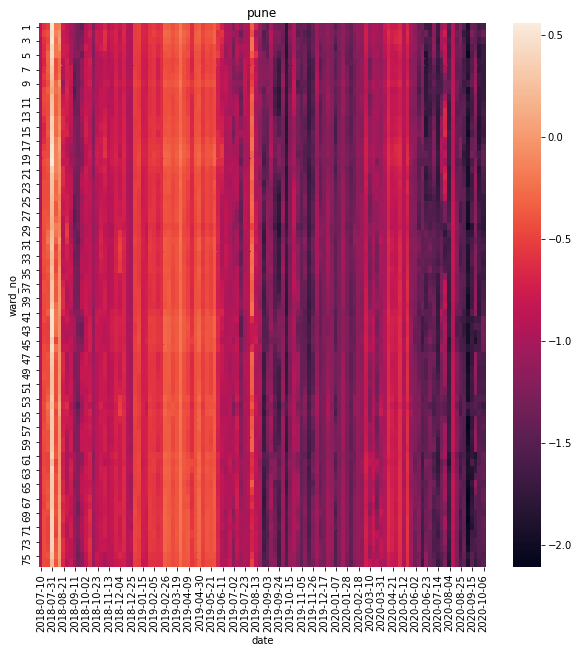

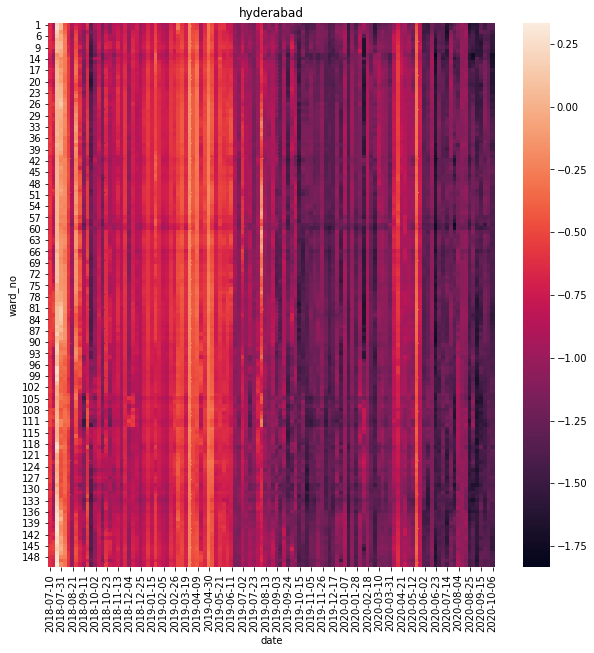

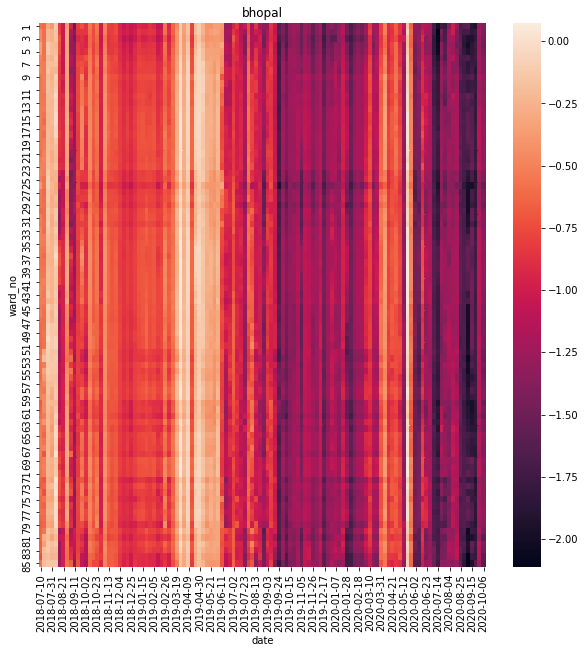

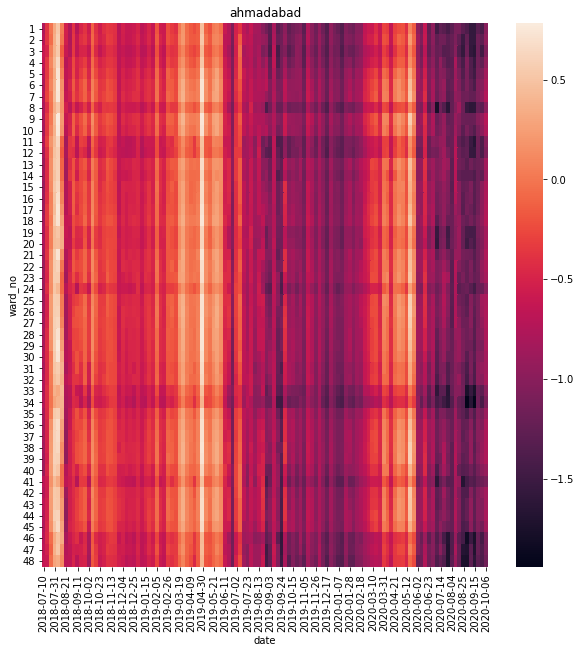

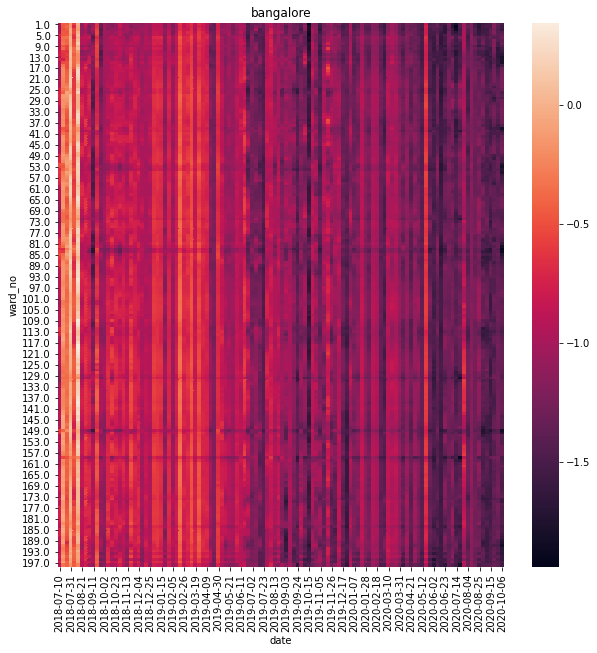

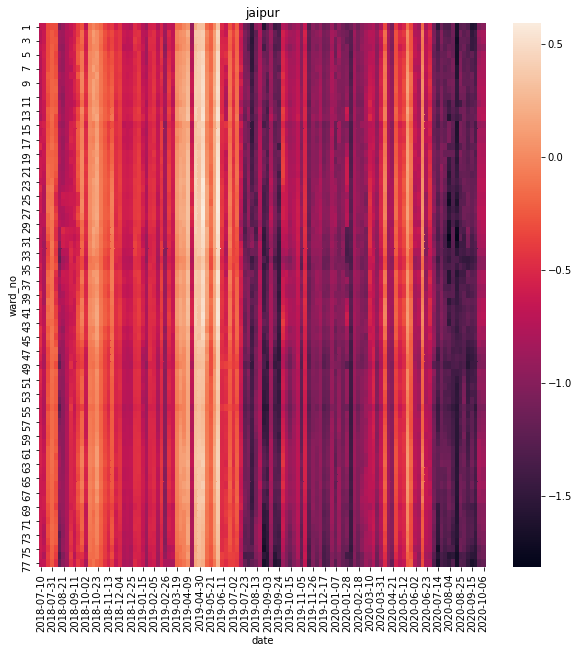

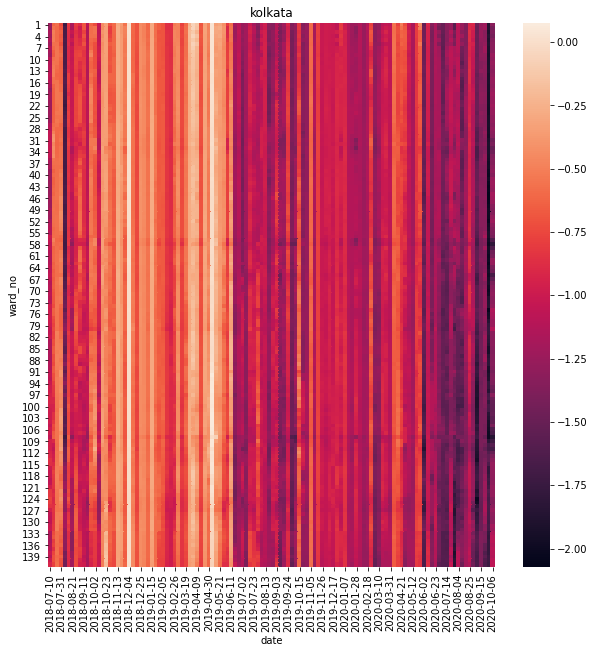

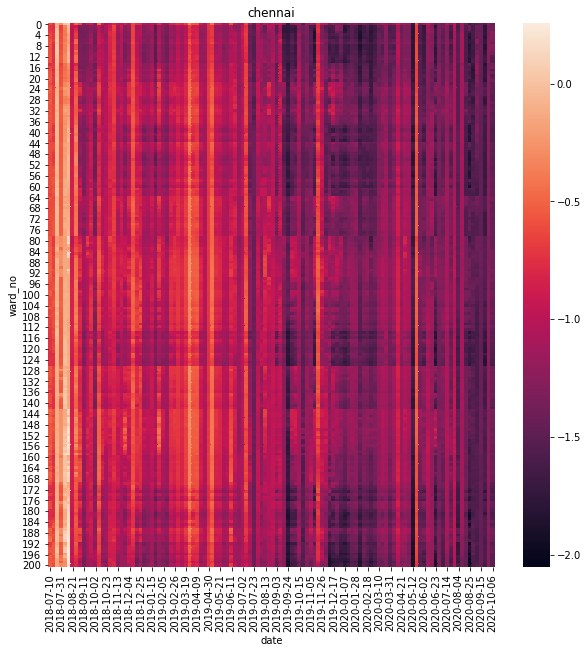

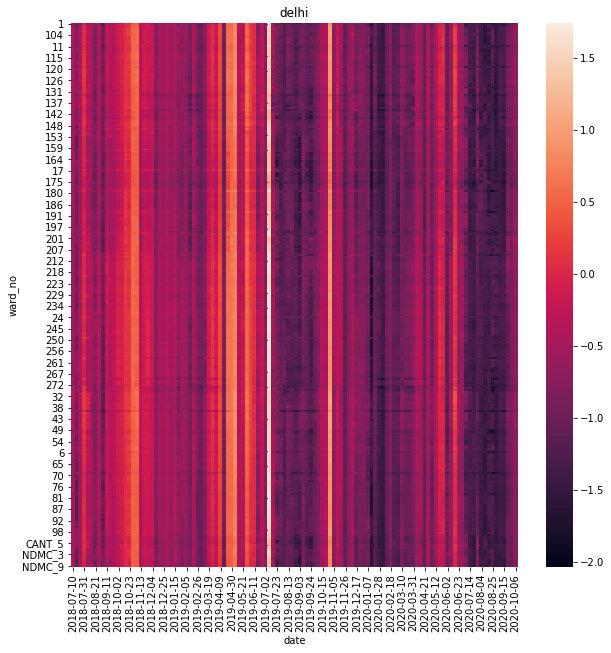

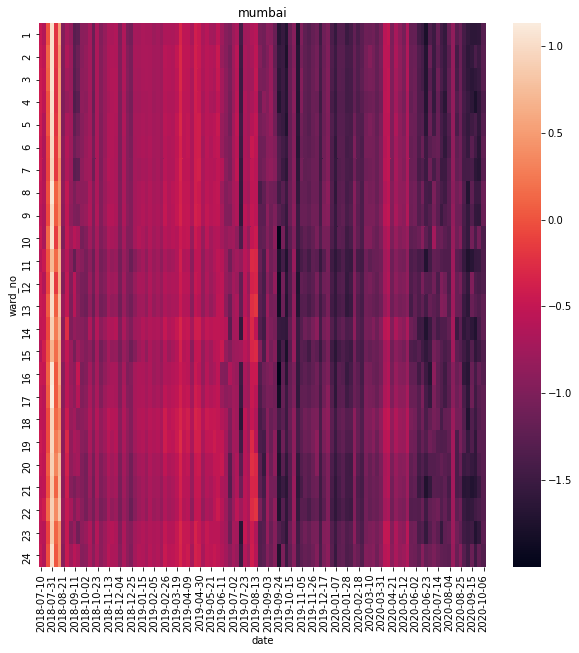

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
for i in range(len(clean)):
    df = clean[i]
    plt.figure(figsize=(10, 10))
    plt.title(city_names[i])
    df_wide=df.pivot_table(index='ward_no', columns='date', values='mean')
    p2=sns.heatmap( df_wide ,linewidths=0)

In order to analyse the differences between the cities, we can plot the change in the average Aerosol Index for each city over the timespan of 27 months. This can gives us an idea of the performance of cities to counter pollution.

In [ ]:
change = []
for city in avg:
    init = float(city.loc[0]['mean']['mean'])
    final = float(city.loc[len(city) - 1]['mean']['mean'])
    change.append(final - init)
change

[-0.6297411263736903,
 -0.8106277807732535,
 -0.8404815152188972,
 -0.07550871658334268,
 -0.535315503328755,
 -0.24661959970228364,
 -0.26592382434434936,
 -0.836350786529352,
 -0.20268977204853744,
 -0.7809418444791665]

NameError: ignored

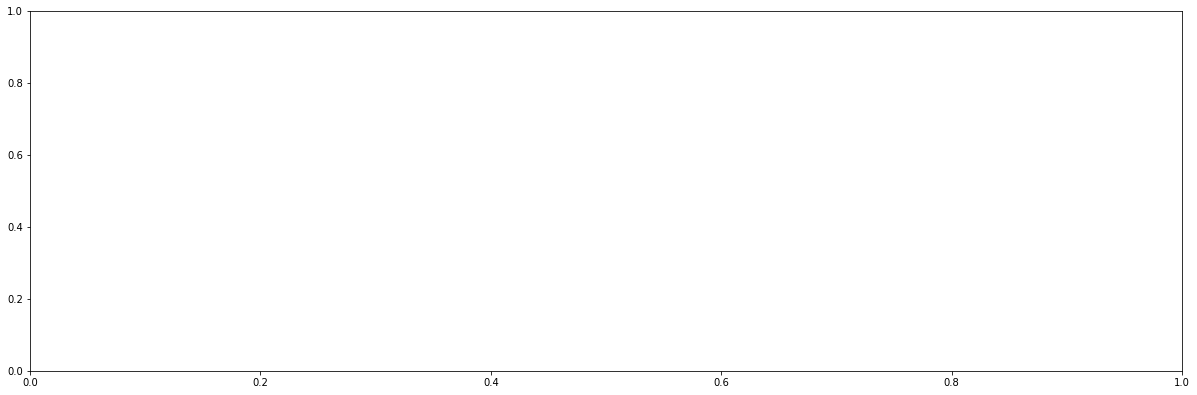

In [141]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(city_names,change)
plt.title('Average Drop in Aerosol Index for each city')
plt.show()

## Conclusion from Univariate Analysis
The bar plot above shows how the different cities part of this analysis performed over time to counter pollution. It can be infered from the data that Bhopal performed the best with the highest drop in Aerosol Index while Ahmadabad performed the worst with the lowest drop in Aerosol Index.

#Prediction of Aerosol Index

In [43]:
new_avg = [pd.DataFrame(df) for df in avg]

In [45]:
for df in new_avg:
  df['date'] = pd.to_datetime(df['date'])
  print(df.dtypes)

date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
      max            float64
dtype: object
date          datetime64[ns]
mean  mean           float64
      min            float64
   

In [46]:
len(avg)

10

In [83]:
import torch
from torch import nn
import numpy as np

In [127]:
y_train = [[float(value)] for value in new_avg[0]['mean']['mean']]

In [128]:
y_train = torch.from_numpy(np.array(y_train))

In [129]:
y_train

tensor([[-0.9304],
        [-0.4836],
        [-0.4181],
        [ 0.3200],
        [-0.3467],
        [-0.0422],
        [-0.7511],
        [-0.8237],
        [-0.8746],
        [-1.2269],
        [-1.2919],
        [-1.0384],
        [-0.8242],
        [-0.7892],
        [-1.0788],
        [-0.8745],
        [-0.8070],
        [-0.7737],
        [-0.8906],
        [-0.8454],
        [-0.7224],
        [-0.7637],
        [-0.6879],
        [-0.9245],
        [-0.9939],
        [-0.5091],
        [-0.5211],
        [-0.7422],
        [-0.7386],
        [-0.5668],
        [-0.5636],
        [-0.6369],
        [-0.6024],
        [-0.3560],
        [-0.3687],
        [-0.4412],
        [-0.3908],
        [-0.2454],
        [-0.4033],
        [-0.4588],
        [-0.6193],
        [-0.4165],
        [-0.3473],
        [-0.5193],
        [-0.4308],
        [-0.4579],
        [-0.3784],
        [-0.6884],
        [-0.8430],
        [-0.9343],
        [-0.9422],
        [-1.0497],
        [-0.

In [175]:
x_train = [[value, value**2, np.exp(value)/10**20] for value in [float((pd.Timestamp(x).value/1000000)/(1000 * 60 * 60 * 24 * 365)) for x in new_avg[0]['date']]]
x_train = torch.from_numpy(np.asarray(x_train))

In [176]:
x_train

tensor([[  48.5534, 2357.4350,   12.2035],
        [  48.5726, 2359.2977,   12.4398],
        [  48.5918, 2361.1612,   12.6807],
        [  48.6110, 2363.0253,   12.9262],
        [  48.6301, 2364.8902,   13.1765],
        [  48.6493, 2366.7559,   13.4316],
        [  48.6685, 2368.6222,   13.6917],
        [  48.6877, 2370.4893,   13.9568],
        [  48.7068, 2372.3572,   14.2271],
        [  48.7260, 2374.2257,   14.5026],
        [  48.7452, 2376.0951,   14.7834],
        [  48.7644, 2377.9651,   15.0696],
        [  48.7836, 2379.8359,   15.3614],
        [  48.8027, 2381.7074,   15.6589],
        [  48.8219, 2383.5797,   15.9621],
        [  48.8411, 2385.4526,   16.2712],
        [  48.8603, 2387.3264,   16.5862],
        [  48.8795, 2389.2008,   16.9074],
        [  48.8986, 2391.0760,   17.2348],
        [  48.9178, 2392.9520,   17.5685],
        [  48.9370, 2394.8286,   17.9087],
        [  48.9562, 2396.7060,   18.2554],
        [  48.9753, 2398.5842,   18.6089],
        [  

In [181]:
class LinearRegression(nn.Module):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear1 = nn.Linear(3, 6)
    self.linear2 = nn.Linear(6, 6)
    self.linear3 = nn.Linear(6, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    out = self.linear3(out)
    return out

In [182]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
  inputs = x_train
  target = y_train

  out = model(inputs.float())
  loss = criterion(out.float(), target.float())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
  predict = model(x_train.float())
predict = predict.data.numpy()

Epoch[1/1000], loss: 215890.343750
Epoch[2/1000], loss: 12005.967773
Epoch[3/1000], loss: 3456.530273
Epoch[4/1000], loss: 24716.341797
Epoch[5/1000], loss: 16646.853516
Epoch[6/1000], loss: 508.393433
Epoch[7/1000], loss: 22214.990234
Epoch[8/1000], loss: 18688.218750
Epoch[9/1000], loss: 1706.480957
Epoch[10/1000], loss: 4081.840332
Epoch[11/1000], loss: 12324.367188
Epoch[12/1000], loss: 6316.649414
Epoch[13/1000], loss: 58.346424
Epoch[14/1000], loss: 4646.772949
Epoch[15/1000], loss: 9306.617188
Epoch[16/1000], loss: 5241.416992
Epoch[17/1000], loss: 454.820465
Epoch[18/1000], loss: 847.044189
Epoch[19/1000], loss: 3394.240479
Epoch[20/1000], loss: 3681.790283
Epoch[21/1000], loss: 1608.213623
Epoch[22/1000], loss: 55.546906
Epoch[23/1000], loss: 698.812012
Epoch[24/1000], loss: 2292.462891
Epoch[25/1000], loss: 2537.485107
Epoch[26/1000], loss: 1215.735474
Epoch[27/1000], loss: 91.904907
Epoch[28/1000], loss: 244.513016
Epoch[29/1000], loss: 1064.646362
Epoch[30/1000], loss: 1379

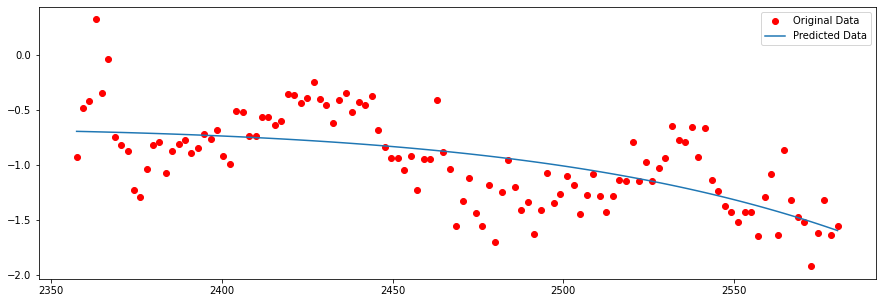

In [183]:
fig = plt.figure(figsize=(15,5))
plt.plot(x_train.numpy().transpose()[1], y_train.numpy(), 'ro', label = 'Original Data')
plt.plot(x_train.numpy().transpose()[1], predict, label = "Predicted Data")
plt.legend()
plt.show()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear1 = nn.Linear(3, 6)
    self.linear2 = nn.Linear(6, 6)
    self.linear3 = nn.Linear(6, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    out = self.linear3(out)
    return out

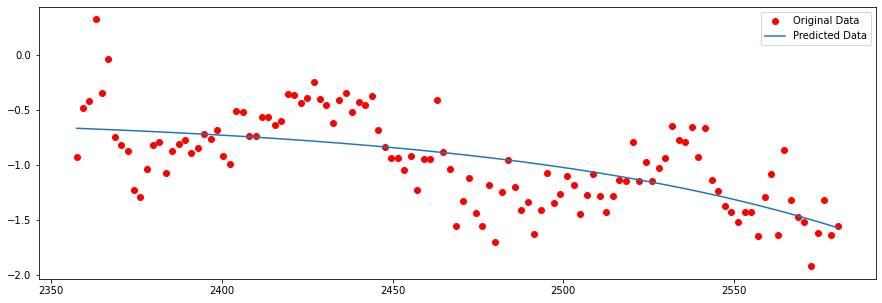

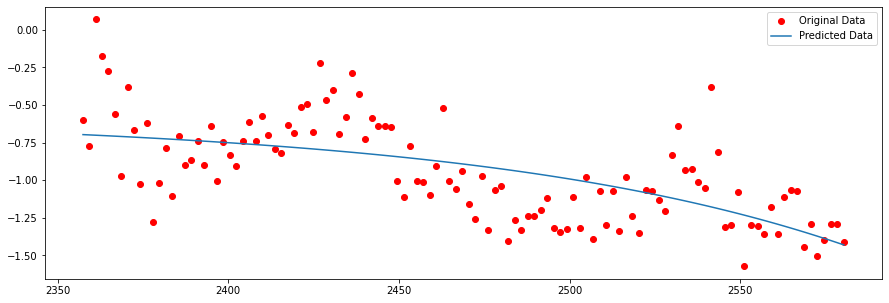

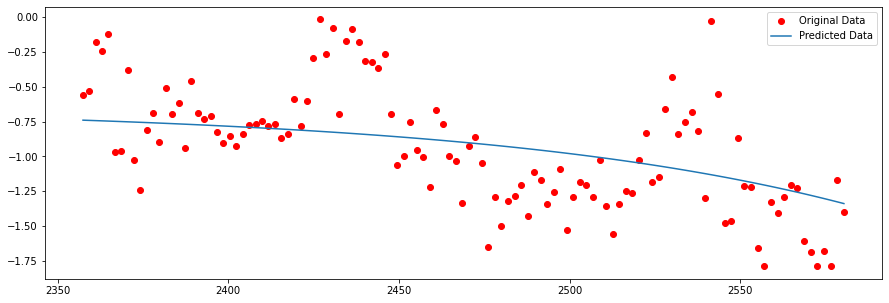

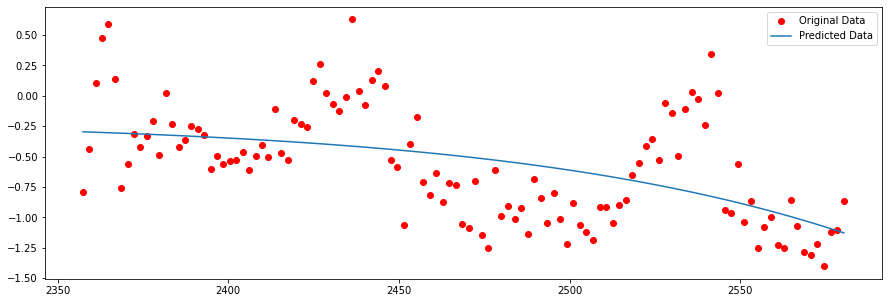

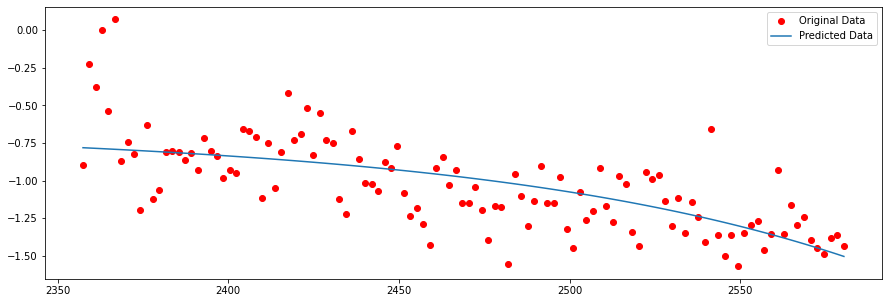

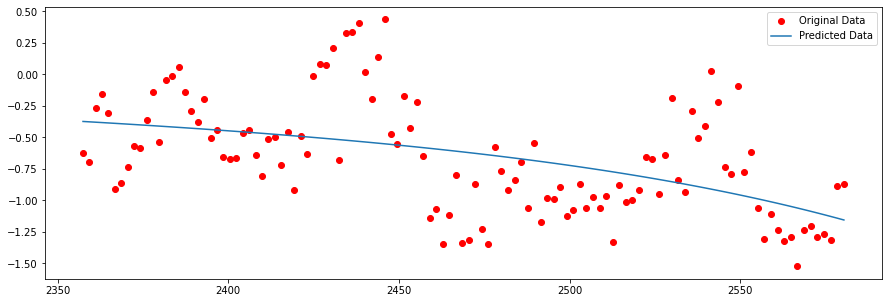

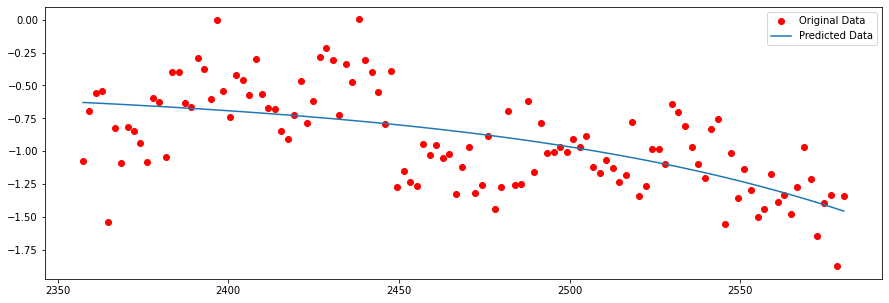

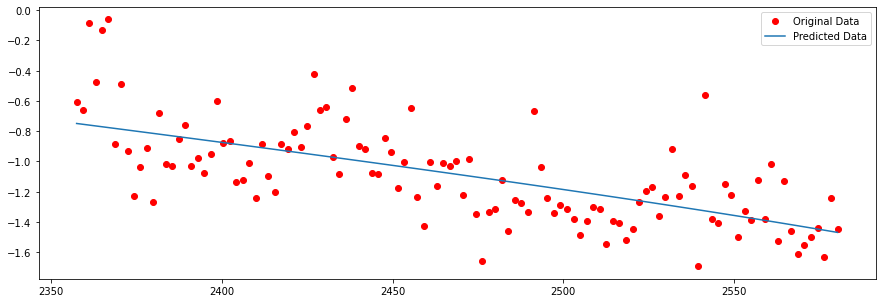

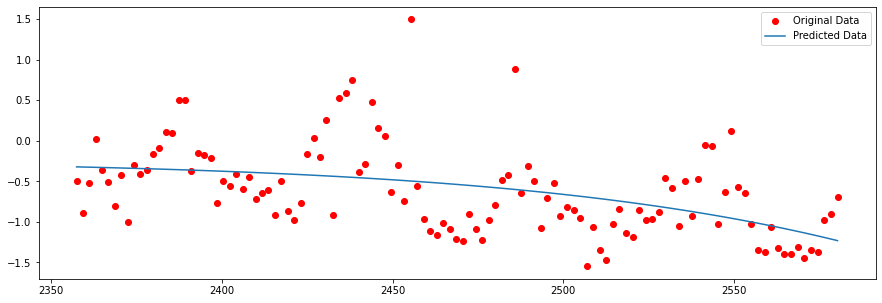

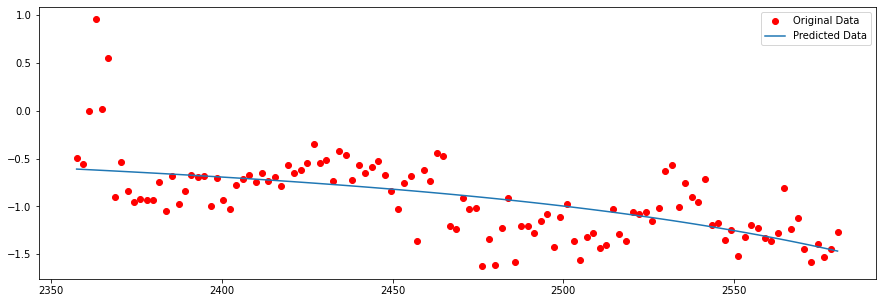

In [233]:
final_preds = []

for i, avg_x in enumerate(new_avg):  
  x_train = [[value, value**2, np.exp(value)/10**20] for value in [float((pd.Timestamp(x).value/1000000)/(1000 * 60 * 60 * 24 * 365)) for x in avg_x['date']]]
  x_train = torch.from_numpy(np.asarray(x_train))

  y_train = [[float(value)] for value in avg_x['mean']['mean']]
  y_train = torch.from_numpy(np.array(y_train))

  model = LinearRegression()
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

  num_epochs = 1000
  for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    out = model(inputs.float())
    loss = criterion(out.float(), target.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

  model.eval()
  with torch.no_grad():
    predict = model(x_train.float())
    predict = predict.data.numpy()

  new_x = []
  x_pred = []
  for x in range(20):
    new_x.append(float((pd.Timestamp(avg_x['date'].max() + pd.DateOffset(days=x*7)).value/1000000)/(1000 * 60 * 60 * 24 * 365)))
  for x in new_x:
    x_pred.append([x, x**2, np.exp(x)/10**20])
  x_pred = torch.from_numpy(np.asarray(x_pred))
  with torch.no_grad():
    y_pred = model(x_pred.float())
  final_preds.append(list(y_pred))

  fig = plt.figure(figsize=(15,5))
  plt.plot(x_train.numpy().transpose()[1], y_train.numpy(), 'ro', label = 'Original Data')
  plt.plot(x_train.numpy().transpose()[1], predict, label = "Predicted Data")
  plt.legend()
  plt.show()

In [235]:
x_pred = []
for x in range(20):
  x_pred.append(avg_x['date'].max() + pd.DateOffset(days=x*7))

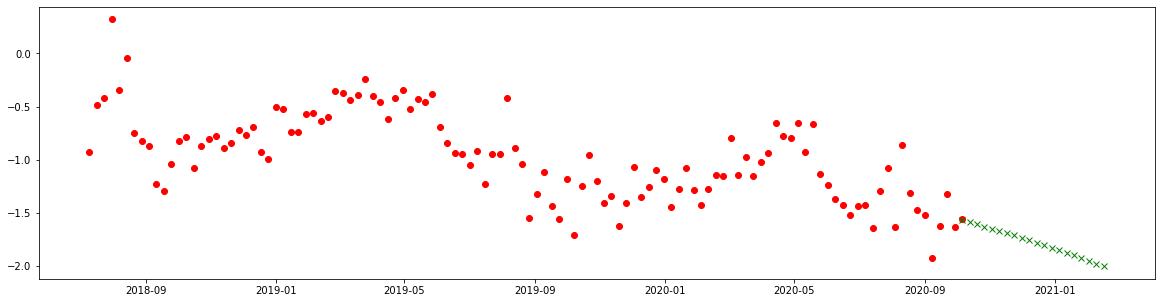

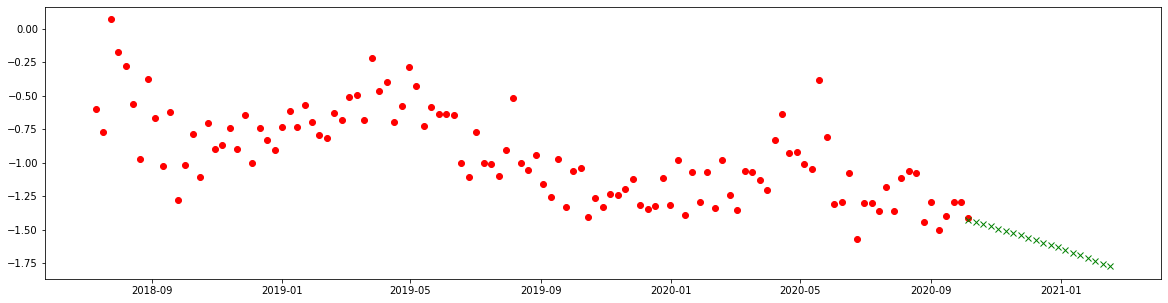

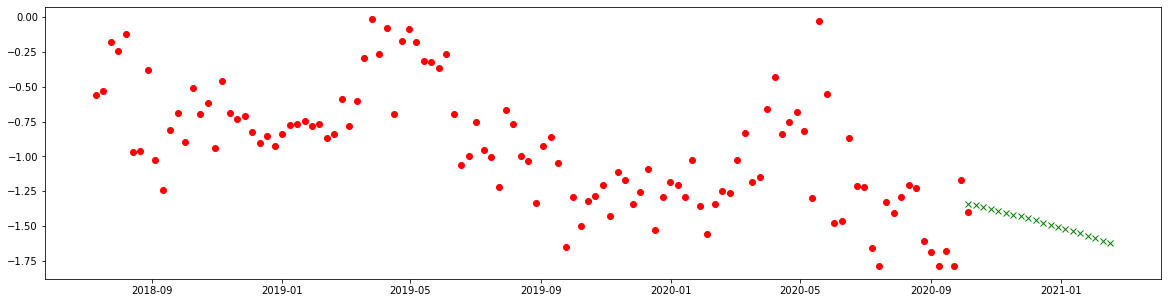

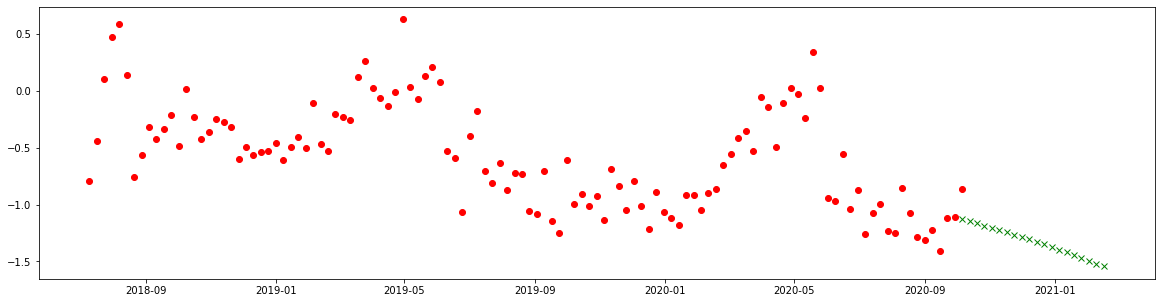

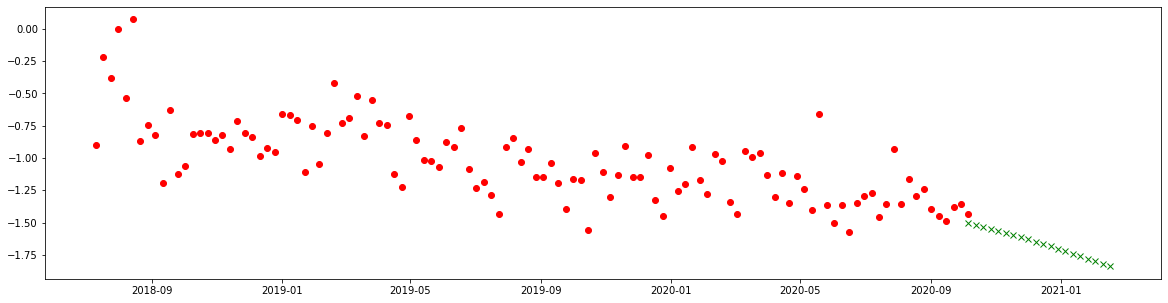

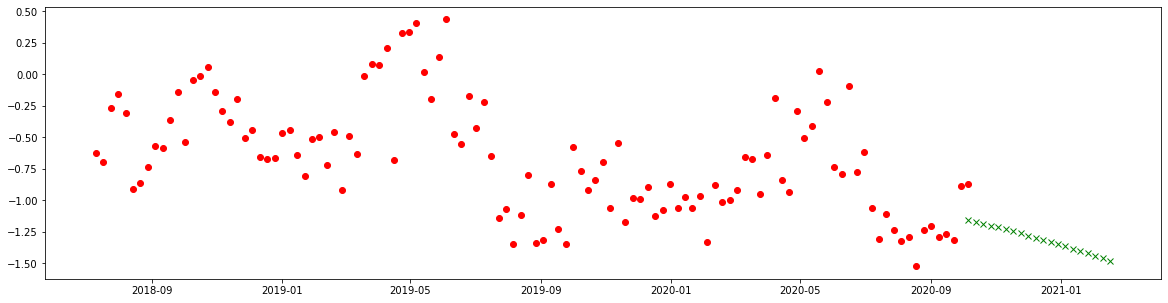

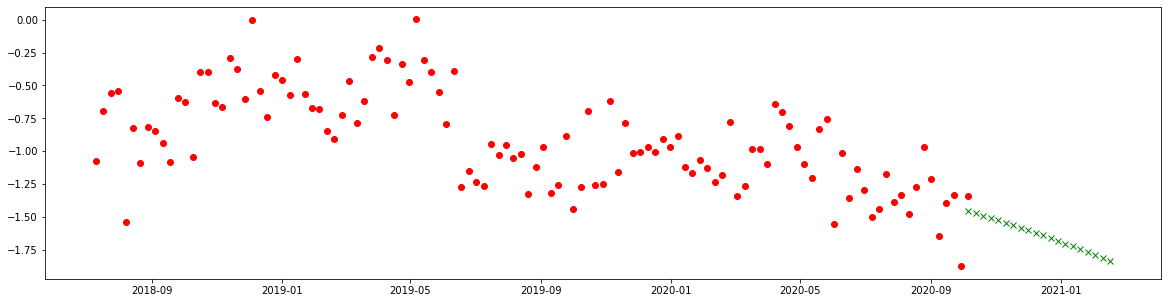

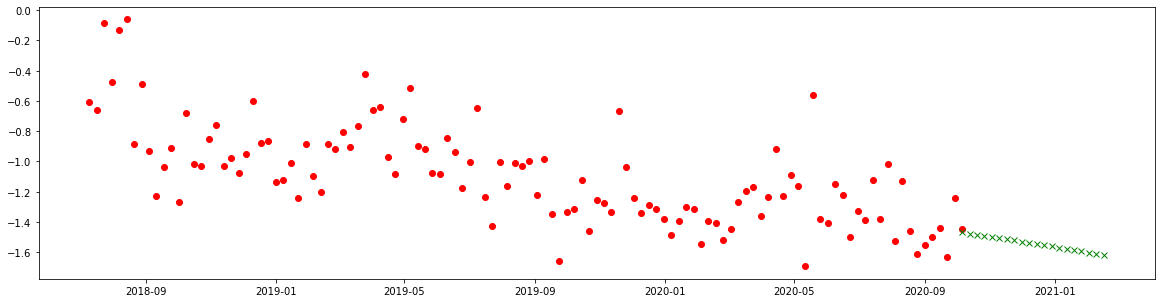

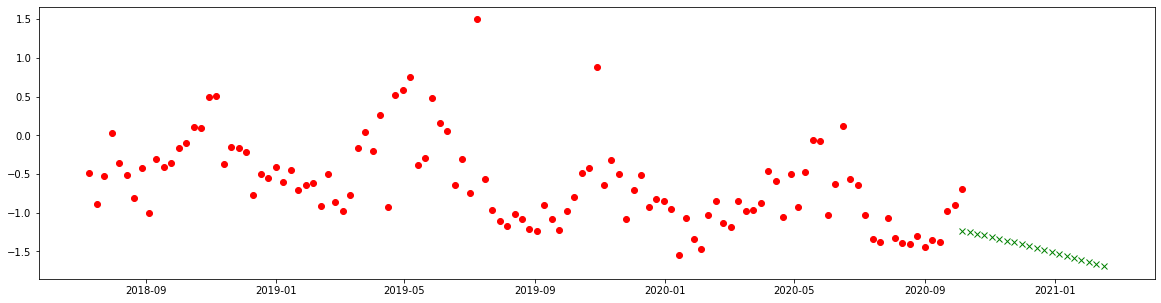

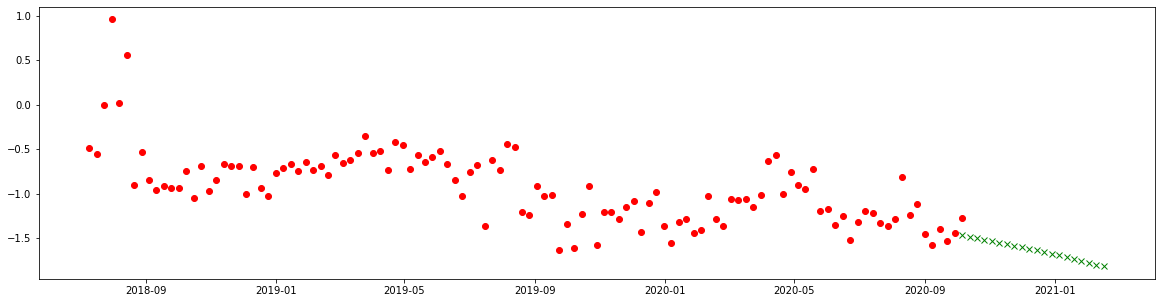

In [236]:
for city, preds, x in zip(city_names, final_preds, new_avg):
  fig = plt.figure(figsize=(20,5))
  plt.plot(x['date'], x['mean']['mean'], 'ro')
  plt.plot(x_pred, preds, 'gx')